In [1]:
import tensorflow as tf

In [2]:
import os

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
directory =r"/Users/richardhopkins/Documents/GitHub/k9-assistant/data/"

In [5]:
SIZE = 224

In [6]:
BATCH_SIZE = 1

In [7]:
image_conv = tf.keras.preprocessing.image.ImageDataGenerator(validation_split=0.3)

In [8]:
train_data = image_conv.flow_from_directory(
    directory, 
    target_size=(SIZE, SIZE), 
    color_mode='rgb', 
    classes=None, 
    class_mode='categorical', 
    batch_size= BATCH_SIZE, 
    shuffle=True,
    subset = 'training'
    )

Found 7 images belonging to 1 classes.


In [9]:
test_data = image_conv.flow_from_directory(
    directory, 
    target_size=(SIZE, SIZE), 
    color_mode='rgb', 
    classes=None, 
    class_mode='categorical', 
    batch_size=BATCH_SIZE, 
    shuffle=True,
    subset = 'validation'
)

Found 3 images belonging to 1 classes.


In [10]:
input_shape = train_data.image_shape

In [11]:
base_model = tf.keras.applications.MobileNetV2(
    input_shape=input_shape,
    include_top=False,
    weights='imagenet')

In [12]:
base_model.trainable = False

In [13]:
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [14]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 7, 7, 1280)        2257984   
_________________________________________________________________
conv2d (Conv2D)              (None, 5, 5, 32)          368672    
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 32)          0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 3)                 99        
Total params: 2,626,755
Trainable params: 368,771
Non-trainable params: 2,257,984
_________________________________________________________________


In [16]:
print('Number of trainable variables = {}'.format(len(model.trainable_variables)))

Number of trainable variables = 4


In [17]:
epochs = 50

In [18]:
history = model.fit(train_data,
                    epochs=epochs,
                    validation_data=test_data)

Epoch 1/50
7/7 [==============================] - 1s 166ms/step - loss: 3.5370 - accuracy: 0.2857 - val_accuracy: 0.0000e+00 - val_loss: 2.6216
Epoch 2/50
7/7 [==============================] - 0s 60ms/step - loss: 2.2190 - accuracy: 0.4286 - val_accuracy: 0.3333 - val_loss: 1.2651
Epoch 3/50
7/7 [==============================] - 0s 59ms/step - loss: 1.7964 - accuracy: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 1.7488
Epoch 4/50
7/7 [==============================] - 0s 58ms/step - loss: 1.9477 - accuracy: 0.8571 - val_accuracy: 0.3333 - val_loss: 1.3403
Epoch 5/50
7/7 [==============================] - 0s 58ms/step - loss: 1.5285 - accuracy: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 1.2187
Epoch 6/50
7/7 [==============================] - 0s 61ms/step - loss: 1.3152 - accuracy: 0.4286 - val_accuracy: 0.3333 - val_loss: 1.3408
Epoch 7/50
7/7 [==============================] - 0s 60ms/step - loss: 1.3432 - accuracy: 0.4286 - val_accuracy: 0.0000e+00 - val_loss: 1.2217
Epoch 

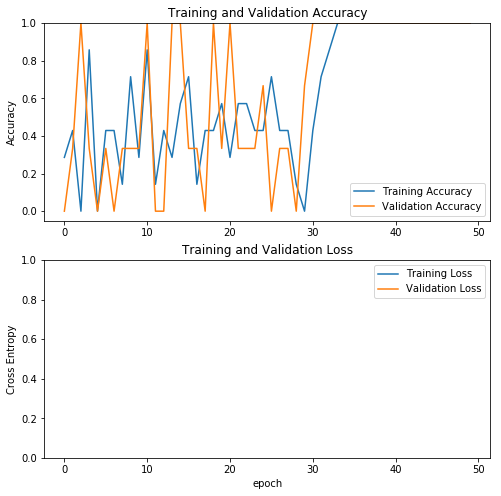

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()), 1])
plt.title('Training and Validation Accuracy')
plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0, 1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [21]:
saved_model_dir = './model.h5'
model.save(saved_model_dir)
print("Model Saved to save/fine_tuning.h5")

converter = tf.lite.TFLiteConverter.from_keras_model(model)

#converter = tf.lite.TFLiteConverter.from_keras_model_file(model)
tflite_model = converter.convert()
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

Model Saved to save/fine_tuning.h5
